In [1]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)

In [2]:
# read the dataset
df = pd.read_csv("retail sales and promotion roi.csv", low_memory=False)

df.head()

,Actual Quantity (Promo-level),ActualAvgPrice (Promo-level),Avg_Price (Promo-level),Avg_UnitsUplift (Promo-level),Avg_Value_sales (Promo-level),AvgBLProfit-System (Promo-level),AvgInvestment-System (Promo-level),BLAvgPrice (Promo-level),BLRev (Promo-level),Brand View Product Name,Date,FinalBLQnty (Promo-level),FINALPROMOID,FINALPROMOSUFFIX,FINALPROMOTYPE,IncProfit-System (Promo-level),Investment-System (Promo-level),Lift (Promo-level),Max_Date,Min_Date,month,Producer,Product,PromoLength,PromoLift(%) (Promo-level),ROI%System (Promo-level),Sub-category,Sub-channel,system margin,TradeSpendTotal (Promo-level),Unit volume,Unit volume2 (Promo-level),Unit volume2 (Promo-level)2,UnitsUplift (Promo-level),Value_Sales (Promo-level),WeightedPullForward (Promo-level),year,flag_2014_2015_halfyear,new system spend _NEGATIVE,vol*ROI,Outlier,brand_view_product_trim,Promo_Flg
0,28.09,6.57147,6.57147,-13.08,184.59,3.94288,0.29155,6.86302,282.51,2075,2/26/12,41.16,12789,1,Type 1 Promo,-59.74,8.19,-31.76,2/26/12,2/26/12,2,Company III,20,1,-31.76,-729.52,Category 2,Sub-channel B,60%,0,9.0,9.0,9.0,-13.08,184.59,0,"2,012.00",OTHER,8.19,"-20,491.80",N,1176,0
1,28.09,6.57147,6.57147,-13.08,184.59,4.9286,0.29155,6.86302,282.51,2075,2/26/12,41.16,12789,1,Type 1 Promo,-72.63,8.19,-31.76,2/26/12,2/26/12,2,Company III,20,1,-31.76,-886.9,Category 2,Sub-channel B,75%,0,9.0,9.0,9.0,-13.08,184.59,0,"2,012.00",OTHER,8.19,"-24,912.52",N,1176,0
2,1.04,6.69000,6.69,-2.06,6.96,4.014,5.3,11.99,37.24,2095,2/26/12,3.11,30486,1,Type 1 Promo,-13.8,5.52,-66.49,2/26/12,2/26/12,2,Company III,20,1,-66.49,-250.24,Category 1,Sub-channel C,60%,0,4.0,4.0,4.0,-2.06,6.96,0,"2,012.00",OTHER,5.52,-260.46,Y,1193,0
3,2.01,7.68507,7.68507,0,15.48,4.61104,0.49114,8.17621,16.5,1675,2/26/12,2.02,25734,1,Type 1 Promo,-1.01,0.99,-0.18,2/26/12,2/26/12,2,Company III,22,1,-0.18,-101.68,Category 1,Sub-channel C,60%,0,4.0,4.0,4.0,0,15.48,0,"2,012.00",OTHER,0.99,-204.8,Y,872,1
4,1.02,6.99000,6.99,0.02,7.15,4.194,1,7.99,8.01,1711,2/26/12,1,26014,1,Type 1 Promo,-0.94,1.02,2.09,2/26/12,2/26/12,2,Company III,22,1,2.09,-91.42,Category 1,Sub-channel C,60%,0,4.0,4.0,4.0,0.02,7.15,0,"2,012.00",OTHER,1.02,-93.54,Y,897,1


In [3]:
# Make a copy to avoid modifying the original
df_clean = df.copy()

# 1. Remove duplicates
df_clean.drop_duplicates(inplace=True)

# 2. Convert numeric columns with commas to float
# Identify problematic columns
comma_cols = df_clean.columns[df_clean.apply(lambda col: col.astype(str).str.contains(",", regex=False).any())]

# Remove commas and convert to float with 2 decimal precision
for col in comma_cols:
    df_clean[col] = df_clean[col].astype(str).str.replace(",", "").astype(float).round(5)

# 3. Convert 'year' and 'month' to integers
df_clean['year'] = pd.to_numeric(df_clean['year'], errors='coerce').fillna(0).astype(int)
df_clean['month'] = pd.to_numeric(df_clean['month'], errors='coerce').fillna(0).astype(int)

# 4. Ensure all numeric columns have 2 decimal places
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
df_clean[numeric_cols] = df_clean[numeric_cols].round(5)

In [4]:
df_clean.head()

,Actual Quantity (Promo-level),ActualAvgPrice (Promo-level),Avg_Price (Promo-level),Avg_UnitsUplift (Promo-level),Avg_Value_sales (Promo-level),AvgBLProfit-System (Promo-level),AvgInvestment-System (Promo-level),BLAvgPrice (Promo-level),BLRev (Promo-level),Brand View Product Name,Date,FinalBLQnty (Promo-level),FINALPROMOID,FINALPROMOSUFFIX,FINALPROMOTYPE,IncProfit-System (Promo-level),Investment-System (Promo-level),Lift (Promo-level),Max_Date,Min_Date,month,Producer,Product,PromoLength,PromoLift(%) (Promo-level),ROI%System (Promo-level),Sub-category,Sub-channel,system margin,TradeSpendTotal (Promo-level),Unit volume,Unit volume2 (Promo-level),Unit volume2 (Promo-level)2,UnitsUplift (Promo-level),Value_Sales (Promo-level),WeightedPullForward (Promo-level),year,flag_2014_2015_halfyear,new system spend _NEGATIVE,vol*ROI,Outlier,brand_view_product_trim,Promo_Flg
0,28.09,6.57147,6.57147,-13.08,184.59,3.94288,0.29155,6.86302,282.51,2075,2/26/12,41.16,12789,1,Type 1 Promo,-59.74,8.19,-31.76,2/26/12,2/26/12,2,Company III,20,1,-31.76,-729.52,Category 2,Sub-channel B,60%,0,9.0,9.0,9.0,-13.08,184.59,0.0,2012,OTHER,8.19,-20491.80,N,1176,0
1,28.09,6.57147,6.57147,-13.08,184.59,4.92860,0.29155,6.86302,282.51,2075,2/26/12,41.16,12789,1,Type 1 Promo,-72.63,8.19,-31.76,2/26/12,2/26/12,2,Company III,20,1,-31.76,-886.90,Category 2,Sub-channel B,75%,0,9.0,9.0,9.0,-13.08,184.59,0.0,2012,OTHER,8.19,-24912.52,N,1176,0
2,1.04,6.69000,6.69000,-2.06,6.96,4.01400,5.30000,11.99000,37.24,2095,2/26/12,3.11,30486,1,Type 1 Promo,-13.80,5.52,-66.49,2/26/12,2/26/12,2,Company III,20,1,-66.49,-250.24,Category 1,Sub-channel C,60%,0,4.0,4.0,4.0,-2.06,6.96,0.0,2012,OTHER,5.52,-260.46,Y,1193,0
3,2.01,7.68507,7.68507,0.00,15.48,4.61104,0.49114,8.17621,16.50,1675,2/26/12,2.02,25734,1,Type 1 Promo,-1.01,0.99,-0.18,2/26/12,2/26/12,2,Company III,22,1,-0.18,-101.68,Category 1,Sub-channel C,60%,0,4.0,4.0,4.0,0.00,15.48,0.0,2012,OTHER,0.99,-204.80,Y,872,1
4,1.02,6.99000,6.99000,0.02,7.15,4.19400,1.00000,7.99000,8.01,1711,2/26/12,1.00,26014,1,Type 1 Promo,-0.94,1.02,2.09,2/26/12,2/26/12,2,Company III,22,1,2.09,-91.42,Category 1,Sub-channel C,60%,0,4.0,4.0,4.0,0.02,7.15,0.0,2012,OTHER,1.02,-93.54,Y,897,1


In [5]:
df_clean.dtypes

Actual Quantity (Promo-level)         float64
ActualAvgPrice (Promo-level)          float64
Avg_Price (Promo-level)               float64
Avg_UnitsUplift (Promo-level)         float64
Avg_Value_sales (Promo-level)         float64
AvgBLProfit-System (Promo-level)      float64
AvgInvestment-System (Promo-level)    float64
BLAvgPrice (Promo-level)              float64
BLRev (Promo-level)                   float64
Brand View Product Name                 int64
Date                                   object
FinalBLQnty (Promo-level)             float64
FINALPROMOID                            int64
FINALPROMOSUFFIX                        int64
FINALPROMOTYPE                         object
IncProfit-System (Promo-level)        float64
Investment-System (Promo-level)       float64
Lift (Promo-level)                    float64
Max_Date                               object
Min_Date                               object
month                                   int32
Producer                          

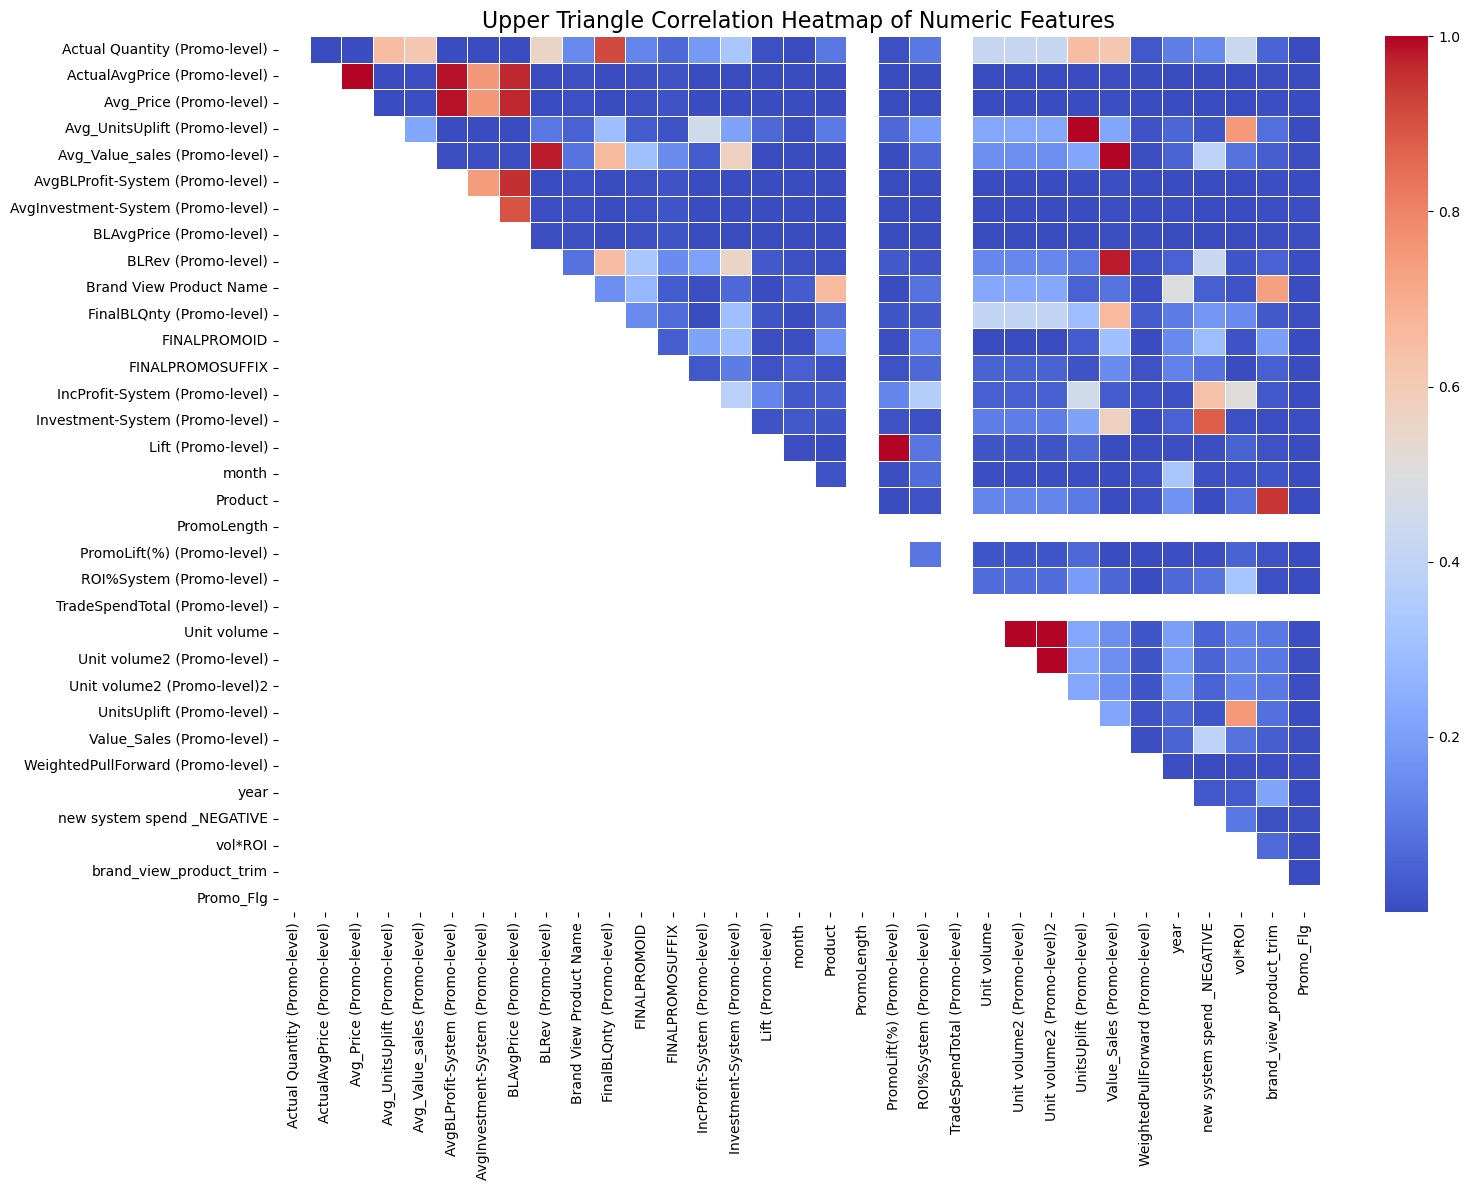

In [6]:
# 1. Select numeric columns
numeric_df = df_clean.select_dtypes(include=[np.number])

# 2. Compute correlation matrix
correlation_matrix = numeric_df.corr().abs()

# 3. Create upper triangle mask to avoid duplicates and self-correlation
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# 4. Plot heatmap using the upper triangle
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, mask=~mask, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Upper Triangle Correlation Heatmap of Numeric Features', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [7]:
# 5. Extract and mark highly correlated column pairs
very_high_corr = correlation_matrix.where(mask)
very_high_corr = very_high_corr.stack().reset_index()
very_high_corr.columns = ['Column A', 'Column B', 'Correlation']
very_high_corr = very_high_corr[very_high_corr['Correlation'] > 0.95].sort_values(by='Correlation', ascending=False)
very_high_corr

,Column A,Column B,Correlation
106,Avg_UnitsUplift (Promo-level),UnitsUplift (Promo-level),1.000000
133,Avg_Value_sales (Promo-level),Value_Sales (Promo-level),1.000000
347,Lift (Promo-level),PromoLift(%) (Promo-level),1.000000
410,Unit volume,Unit volume2 (Promo-level),1.000000
411,Unit volume,Unit volume2 (Promo-level)2,1.000000
420,Unit volume2 (Promo-level),Unit volume2 (Promo-level)2,1.000000
30,ActualAvgPrice (Promo-level),Avg_Price (Promo-level),1.000000
61,Avg_Price (Promo-level),AvgBLProfit-System (Promo-level),0.986927
33,ActualAvgPrice (Promo-level),AvgBLProfit-System (Promo-level),0.986927
117,Avg_Value_sales (Promo-level),BLRev (Promo-level),0.977965


In [8]:
# Clean-Up
columns_to_drop = [
    'UnitsUplift (Promo-level)',              # keep Avg_UnitsUplift
    'Value_Sales (Promo-level)',              # keep Avg_Value_sales
    'Lift (Promo-level)',                     # keep PromoLift(%)
    'Unit volume',                            # keep Unit volume2 (Promo-level)
    'Unit volume2 (Promo-level)2',            # drop redundant duplicate
    'Unit volume2 (Promo-level)',             # drop base version (already have a better one)
    'ActualAvgPrice (Promo-level)'            # keep Avg_Price
]

# Drop columns
df_clean.drop(columns=columns_to_drop, inplace=True)

In [9]:
# Save the cleaned DataFrame to a CSV file for Tableau use
output_file = "retail_sales_and_promotion_cleaned.csv"
df_clean.to_csv(output_file, index=False)